# **Práctica 4: Back Propagation**

Statistical Learning II

Eddson Sierra

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

### **1. Datos de entrada y etiquetas**

In [22]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [0, 0]])

In [23]:
Y = np.array([0,1,1,0]).reshape(4,1)
Y

array([[0],
       [1],
       [1],
       [0]])

## **2. Forward propagation**

### Función de activación

In [24]:
def relu(x):
  return np.maximum(0,x)

In [25]:
def identidad(x):
  return x

### Inicialización aleatoria de parámetros

Inicializando las matrices de pesos de forma aleatoria con distribucion normal centrada en 0 y desviacion estandar de 0.1:

In [26]:
def init_parametros():
  W1 = np.random.normal(loc=0,scale=0.1,size=(2,2))
  W2 = np.random.normal(loc=0,scale=0.1,size=(2,2))
  W3 = np.random.normal(loc=0,scale=0.1,size=(2,1))
  return W1, W2, W3

In [27]:
W1, W2, W3 = init_parametros()
W1, W2, W3

(array([[-0.1079738 ,  0.02943851],
        [-0.11803567,  0.02628045]]), array([[-0.11367847, -0.01930687],
        [ 0.06064197,  0.13014866]]), array([[ 0.10788427],
        [-0.09834711]]))

Con los parámetros inicializados y la función de activación podemos crear una función para forward propagation:

In [28]:
def forward_prop(x,w1,w2,w3):
  # Primera Capa Oculta
  z1 = np.matmul(x,w1)
  a1 = relu(z1)

  # Segunda Capa Oculta
  z2 = np.matmul(a1,w2)
  a2 = relu(z2) # Representacion intermedia de la segunda capa oculta

  # Salida sin activacion
  zout = np.matmul(a2,w3)
  aout = identidad(zout)

  return z1, a1, z2, a2, zout, aout

Calculamos la salida:

In [29]:
Z1, A1, Z2, A2, Zout, Aout = forward_prop(X,W1,W2,W3)
Aout

array([[ 0.        ],
       [-0.00016445],
       [-0.00018421],
       [ 0.        ]])

## **3. Back Propagation**

### Función de costo

In [30]:
def mse(y,y_hat):
  return 1/2*np.mean(np.power(y_hat-y,2))

In [31]:
mse(Y,Aout)

0.25008717197094105

### Derivada de la función de activación

In [32]:
def relu_prima(x):
  x[x<0] = 0
  x[x>0] =1
  return x

In [33]:
def identidad_prima(x):
  return 1

Creamos una función que propaga el error hacia las entradas y calcula las derivadas del costo respecto a los parámetros:

In [34]:
def backward_prop(z1, a1, z2, a2, zout, aout, w1, w2, w3, x, y):
  # terminos de error
  delta = aout - y
  te3 = delta*identidad_prima(zout)
  te2 = np.matmul(te3,w3.T)*relu_prima(z2)
  te1 = np.matmul(te2,w2.T)*relu_prima(z1)

  # derivada del costo respecto a los parametros
  dCw3 = np.matmul(a2.T, te3)
  dCw2 = np.matmul(a1.T, te2)
  dCw1 = np.matmul(x.T, te1)

  return dCw1, dCw2, dCw3

In [35]:
dCW1, dCW2, dCW3 = backward_prop(Z1, A1, Z2, A2, Zout, Aout, W1, W2, W3, X, Y)

### Actualización de los pesos

In [36]:
def update_parametros(lr, w1, w2, w3, dCw1, dCw2, dCw3):
  w1 = w1 - lr*dCw1
  w2 = w2 - lr*dCw2
  w3 = w3 - lr*dCw3

  return w1, w2, w3

In [37]:
W1, W2, W3 = update_parametros(0.001, W1, W2, W3, dCW1, dCW2, dCW3)

## **4. Unir todo**

In [90]:
def entrenar_modelo(x,y,epochs,learning_rate, verbose):
  
  w1, w2, w3 = init_parametros()

  losses = []

  for epoch in range(epochs):
    z1, a1, z2, a2, zout, aout = forward_prop(x,w1,w2,w3)
    loss = mse(y,aout)
    if verbose == 1:

      print('Epoch:{}--->, Salida XOR:{}{}{}{}, loss:{}\n'.format(epoch,
                                                      aout[0],aout[1],aout[2],aout[3],
                                                      loss))
    elif verbose == 0:
      continue
    losses.append(loss)
    dCw1, dCw2, dCw3 = backward_prop(z1, a1, z2, a2, zout, aout, w1, w2, w3, x, y)
    w1, w2, w3 = update_parametros(learning_rate, w1, w2, w3, dCw1, dCw2, dCw3)

  #print('Representacion intermedia de la segunda capa oculta -->')  
  return a2

In [120]:
entrenar_modelo(X,Y,10,0.1,verbose=1)

Epoch:0--->, Salida XOR:[0.][-0.00743503][-0.00273166][0.], loss:0.25254951566364814

Epoch:1--->, Salida XOR:[0.][-0.00686769][-0.00240848][0.], loss:0.2523256649219111

Epoch:2--->, Salida XOR:[0.][-0.0063573][-0.00212322][0.], loss:0.2521257439238382

Epoch:3--->, Salida XOR:[0.][-0.00589659][-0.00187068][0.], loss:0.2519466010161706

Epoch:4--->, Salida XOR:[0.][-0.00547943][-0.00164651][0.], loss:0.2517855751594793

Epoch:5--->, Salida XOR:[0.][-0.00510057][-0.00144701][0.], loss:0.25164040811384136

Epoch:6--->, Salida XOR:[0.][-0.00475553][-0.00126906][0.], loss:0.2515091742813763

Epoch:7--->, Salida XOR:[0.][-0.00444044][-0.00110998][0.], loss:0.25139022427877034

Epoch:8--->, Salida XOR:[0.][-0.00415198][-0.00096749][0.], loss:0.25128213926695225

Epoch:9--->, Salida XOR:[0.][-0.00388726][-0.00083961][0.], loss:0.25118369376844907



array([[0.        , 0.        ],
       [0.01254766, 0.02165534],
       [0.00236663, 0.00548404],
       [0.        , 0.        ]])

### Representaciones intermedias

In [111]:
def graficar_int(numero_experimento):
  colours = ListedColormap(['r','b'])
  classes = ["0","1"]
  plot = plt.scatter(experimentos[numero_experimento-1][:,0],experimentos[numero_experimento-1][:, 1],c=list(Y),cmap=colours)

  plt.legend(handles=plot.legend_elements()[0],labels=classes)
  plt.title("Representación intermedia de la Capa 2 | Experimento {}".format(numero_experimento))
  plt.grid(True)
  plt.show()

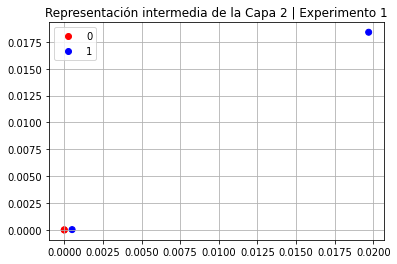

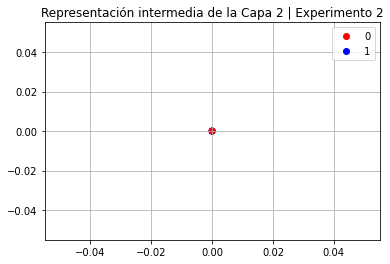

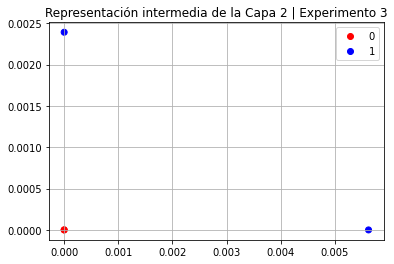

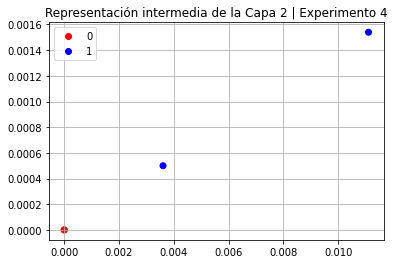

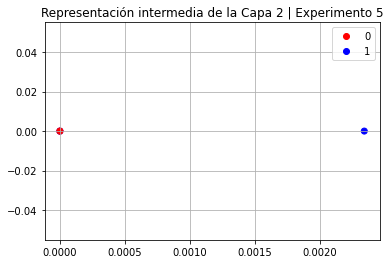

In [114]:
experimentos = []
for experimento in range(1,6):
  experimentos.append(entrenar_modelo(X,Y,10,0.1,0))

  graficar_int(experimento)

**Comparación:**

Al comparar las representaciones intermedias en los 5 experimentos y observar los resultados de uno de los entrenamientos del modelo, se puede verificar que en cada experimento la representación de la capa oculta 2, es muy diferente. No es posible trazar una misma línea que separe los elementos 0 y 1. 

## **5. Conclusiones**

* El proceso de back propagation (propagación hacia atrás) es el algoritmo iterativo que permite entrenar una red neuronal o perceptrón multicapa. Consiste, esencialmente, en calcular la derivada del costo respecto a los parámetros a través de la regla de la cadena. Este último número permite, junto con el learnin rate, aplicar el algoritmo de gradient descent y actualizar los parámetros. 

* En el caso particular de la implementación de este modelo de aproximación XOR, no se obtuvieron buenos resultados ocasionados por su arquitectura. La función de activación ReLU es proclive a generar el efecto de 'dying ReLu' debido a que con el paso de las iteraciones las derivadas pueden comenzar a aproximarse a cero y eso impide que el modelo converga a un punto óptimo. 

* Como se trabajó en el ejercicio de forward propagation anterior, una función de activación sigmoid para las capas intermedias y la salida produciría mejores resultados en este modelo. 

* Las gráficas de la representación intermedia de la segunda capa de esta red, permite concluir que en ningún experimento es posible trazar la misma línea (con los mismos pesos o similares) que separen las clases (0 o 1). Nunca, las representación intermedia de 2 experimentos tiene los mismos puntos, esto sucede porque la matriz de salida de la representación proviene de la activación ReLU que provoca un decaimiento del gradiente a lo largo del tiempo.

* Este ejercicio ha sido muy útil para comprender el proceso de propagación hacia atrás que ocurre automáticamente en los métodos '.fit()' de la mayoría de los frameworks existentes. La realización de esta práctica permite comprender la importancia fundamental del cálculo y principalmente del concepto de la regla de la cadena y sus aplicaciones en problemas como este. 